In [1]:
import pathview
import json
from pathsim.blocks import Scope
import matplotlib.pyplot as plt
import numpy as np

# read graph data from a JSON file
with open("festim.json", "r") as f:
    graph_data = json.load(f)

model, duration = pathview.make_pathsim_model(graph_data)

model.run(duration)

0.001 <class 'str'>
1e-16 <class 'str'>
1e-10 <class 'str'>
200 <class 'str'>
1 <class 'str'>
14:50:40 - INFO - LOGGING (log: True)
14:50:40 - INFO - BLOCKS (total: 4, dynamic: 0, static: 4, eventful: 1)
14:50:40 - INFO - GRAPH (nodes: 4, edges: 3, alg. depth: 2, loop depth: 0, runtime: 0.027ms)
14:50:40 - INFO - STARTING -> TRANSIENT (Duration: 1.00s)
1.0414936008434077e-12
1.717990603981092e-11
1.4601691712732148e-10
8.526218074285177e-10
3.847975972097954e-09
1.4316754179915814e-08
4.573965360344209e-08
1.290533713401077e-07
3.2822656318997524e-07
7.643252081408086e-07
14:50:40 - INFO - --------------------   1% | 0.1s<7.3s | 135.1 it/s


/home/remidm/miniconda3/envs/fuel-cycle-paper/lib/python3.14/site-packages/festim/coupled_heat_hydrogen_problem.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  import tqdm.autonotebook


1.6496780030729291e-06
3.332824072515631e-06
6.3536463073903306e-06
1.1506673048327318e-05
1.9909215997498233e-05
3.307002747521053e-05
5.2953658662540734e-05
8.203574080397034e-05
0.00012334495900488319
0.00018048843664056325
0.00025765844933823054
0.0003596196825456498
0.000491677492594782
0.0006596287163991687
0.0008696974270604498
0.0011284586180031325
0.001442753116254761
0.0018195971004219631
0.002266089470927148
0.0027893200369918185
0.0033962810955935857
0.004093784527471679
0.004888386062964541
0.005786317906875968
0.00679343047939515
0.007915143644490492
0.009156407466777625
0.010521672265962628
0.01201486752389592
0.013639389039508296
0.015398093616071801
0.017293300496960748
0.019326798733636276
0.021499859666289974
0.02381325371721695
0.026267270733909567
0.028861743168144365
0.03159607143478649
0.034469250856198126
0.03747989966222056
0.0406262875795268
0.043906364606065756
0.04731778962514942
0.05085795856865638
0.05452403188933413
0.05831296114801861
0.06222151456268404

{'total_steps': 1000,
 'successful_steps': 1000,
 'runtime_ms': 7184.365300927311}

In [2]:
import morethemes as mt
mt.set_theme("lighter")

In [3]:
def downstream_flux(t, c_up, D, L):
    n_array = np.arange(1, 10000)[:, np.newaxis]
    summation = np.sum((-1)**n_array * np.exp(-(np.pi * n_array)**2 * D/L**2 * t), axis=0)
    return c_up * D / L * (2*summation + 1)

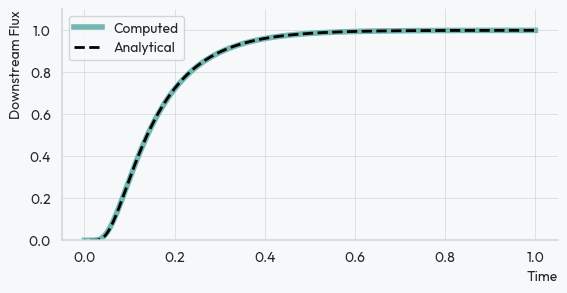

In [7]:
scopes = [block for block in model.blocks if isinstance(block, Scope)]
assert len(scopes) == 1, "This script assumes there is only one scope."
scope = scopes[0]

sim_time, data = scope.read()
rc = plt.rcParams
plt.figure(figsize=(rc["figure.figsize"][0], 3))
for p, d in enumerate(data):
    plt.plot(sim_time, d, label="Computed", linewidth=4)

time = np.linspace(0, duration, 1000)
plt.plot(time, downstream_flux(time, D=1.0, c_up=1, L=1), 'k--', label="Analytical", linewidth=2)
plt.ylim(bottom=0)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Downstream Flux")
plt.savefig("festim_analytical_comparison.pdf", bbox_inches='tight')
plt.show()

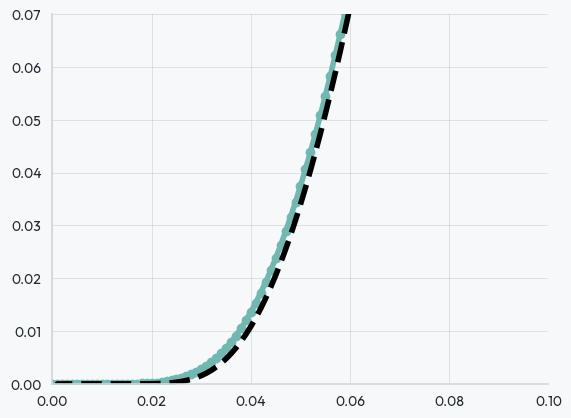

In [5]:

for i, scope in enumerate(scopes):
    sim_time, data = scope.read()
    for p, d in enumerate(data):
        lb = scope.labels[p] if p < len(scope.labels) else f"port {p}"
        plt.plot(sim_time, d, label=lb, linewidth=4, marker='o')

time = np.linspace(0, duration, 1000)
plt.plot(time, downstream_flux(time, D=1.0, c_up=1, L=1), 'k--', label="Analytical", linewidth=4)
plt.ylim(bottom=0, top=0.07)
plt.xlim(left=0, right=0.1)
plt.show()

In [6]:
# print(d)
np.diff(d)

array([1.04149360e-12, 1.61384124e-11, 1.28837011e-10, 7.06604890e-10,
       2.99535416e-09, 1.04687782e-08, 3.14228994e-08, 8.33137177e-08,
       1.99173192e-07, 4.36098645e-07, 8.85352795e-07, 1.68314607e-06,
       3.02082223e-06, 5.15302674e-06, 8.40254295e-06, 1.31608115e-05,
       1.98836312e-05, 2.90820821e-05, 4.13092182e-05, 5.71434776e-05,
       7.71700127e-05, 1.01961233e-04, 1.32057810e-04, 1.67951224e-04,
       2.10068711e-04, 2.58761191e-04, 3.14294498e-04, 3.76843984e-04,
       4.46492371e-04, 5.23230566e-04, 6.06961059e-04, 6.97503432e-04,
       7.94601535e-04, 8.97931844e-04, 1.00711257e-03, 1.12171317e-03,
       1.24126382e-03, 1.36526480e-03, 1.49319526e-03, 1.62452152e-03,
       1.75870458e-03, 1.89520688e-03, 2.03349824e-03, 2.17306093e-03,
       2.31339405e-03, 2.45401702e-03, 2.59447243e-03, 2.73432827e-03,
       2.87317942e-03, 3.01064881e-03, 3.14638792e-03, 3.28007703e-03,
       3.41142502e-03, 3.54016894e-03, 3.66607332e-03, 3.78892926e-03,
      